<a href="https://colab.research.google.com/github/RanxduG/Sri-Lanka-Formaldehyde-Level-Analysis/blob/main/Nuwara_Eliye_HCHO_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING GENERAL LIBRARIES**

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive

#**LOADING DATASET**


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Nuwara_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/nuwara_joined_data.csv')

#**PREPARING DATASET FOR ANAYSIS**


In [ ]:
# Assuming 'date' column is in string format
Nuwara_data['date'] = pd.to_datetime(Nuwara_data['date'])

In [ ]:
Nuwara_data.set_index('date', inplace=True)

In [ ]:
Nuwara_data.rename(columns={'HCHO reading': 'HCHO_reading'}, inplace=True)

#**DESCRIBING DATA**


In [ ]:
Nuwara_data.head()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading,Location,Current Date,Next Date,month
date,,,,,,,,,,,,,,,
2019-01-01,20.58,20.87,14.16,87.94,0.19,93.93,4.46,37.69,6.23,38.38,0.000088,Nuwara Eliya Proper,2019-01-01,2019-01-02,2019-01
2019-01-02,20.12,20.50,13.67,87.75,0.03,93.91,3.56,35.44,5.17,36.31,0.000088,Nuwara Eliya Proper,2019-01-02,2019-01-03,2019-01
2019-01-03,19.84,20.14,13.24,86.75,0.03,93.96,3.97,28.62,5.65,29.25,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04,2019-01
2019-01-04,19.56,19.87,13.12,87.25,0.01,93.91,3.52,38.50,5.38,39.06,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05,2019-01
2019-01-05,20.80,21.09,14.47,88.12,0.04,93.80,3.69,35.62,5.59,36.00,0.000065,Nuwara Eliya Proper,2019-01-05,2019-01-06,2019-01


In [ ]:
Nuwara_data.describe()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,22.770854,23.051769,16.279869,88.200093,6.106577,93.522952,3.540854,178.747503,4.995482,178.491627,0.000088
std,1.083199,1.253023,1.129104,4.366825,7.940401,0.138643,1.676772,89.107081,2.190423,89.083585,0.000051
min,18.460000,18.300000,10.310000,65.190000,0.000000,93.110000,0.580000,20.060000,0.860000,10.810000,0.000000
25%,22.180000,22.320000,15.810000,86.440000,0.700000,93.430000,2.140000,74.152500,3.120000,74.282500,0.000057
50%,22.795000,23.050000,16.420000,89.120000,3.270000,93.520000,3.375000,229.155000,4.940000,228.440000,0.000085
75%,23.420000,23.767500,17.030000,91.060000,8.547500,93.617500,4.830000,252.690000,6.657500,252.485000,0.000112
max,26.230000,27.670000,19.170000,96.880000,63.030000,93.990000,9.150000,348.120000,12.280000,348.500000,0.000378


In [ ]:
features_to_remove = ['Location',	'Current Date', 	'Next Date', 	'month']
Nuwara_data = Nuwara_data.drop(features_to_remove, axis=1)

#**CHECKING EACH COLUMN OF DATA**


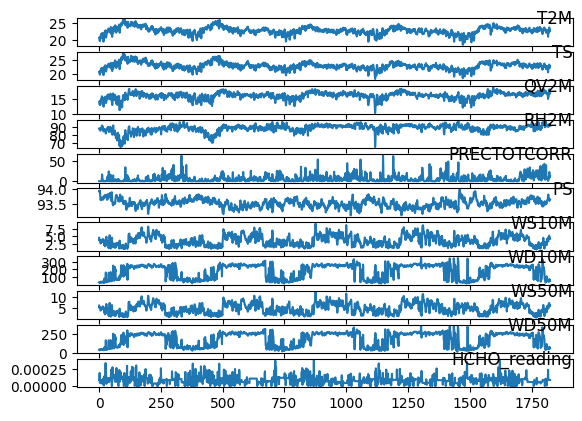

In [ ]:
from matplotlib import pyplot as plt

values = Nuwara_data.values
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(Nuwara_data.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

#**HCHO READING VS DATE**


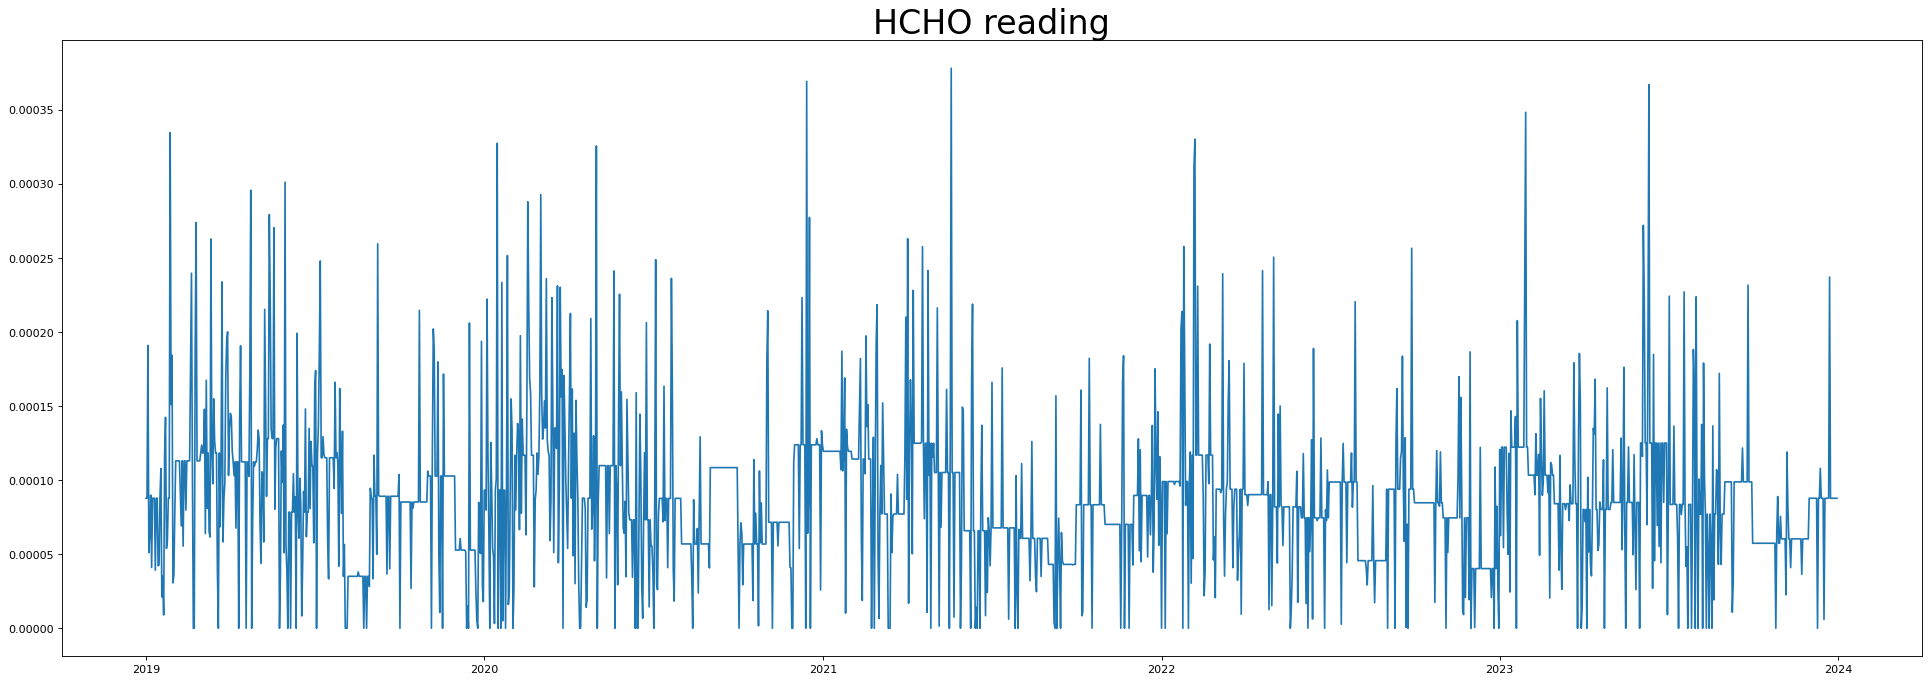

In [ ]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('HCHO reading', fontsize=30)

plt.plot(Nuwara_data.HCHO_reading)

#**USING SEASONAL DECOMPOSE TO IDENTIFY TREND AND SEASONALITY**


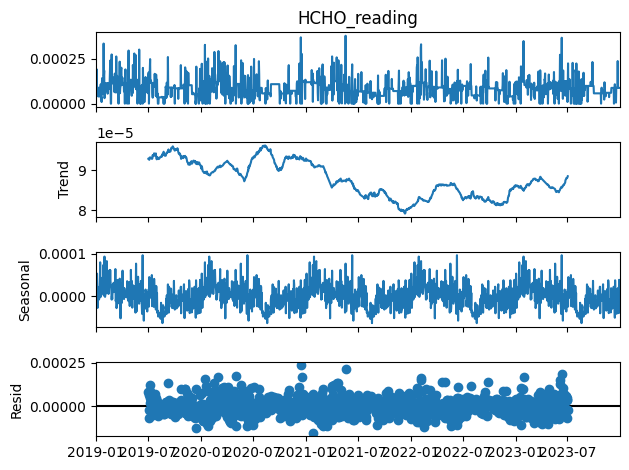

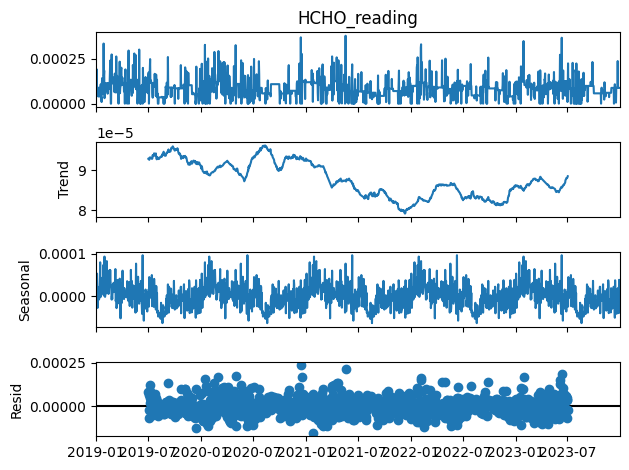

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = Nuwara_data.HCHO_reading
result = seasonal_decompose(series, model='additive', period=365)
result.plot()

#**PLOTING HCHO ROLLING MEAN AND ROLLING STANDARD DEVIATION (WINDOW=30)**


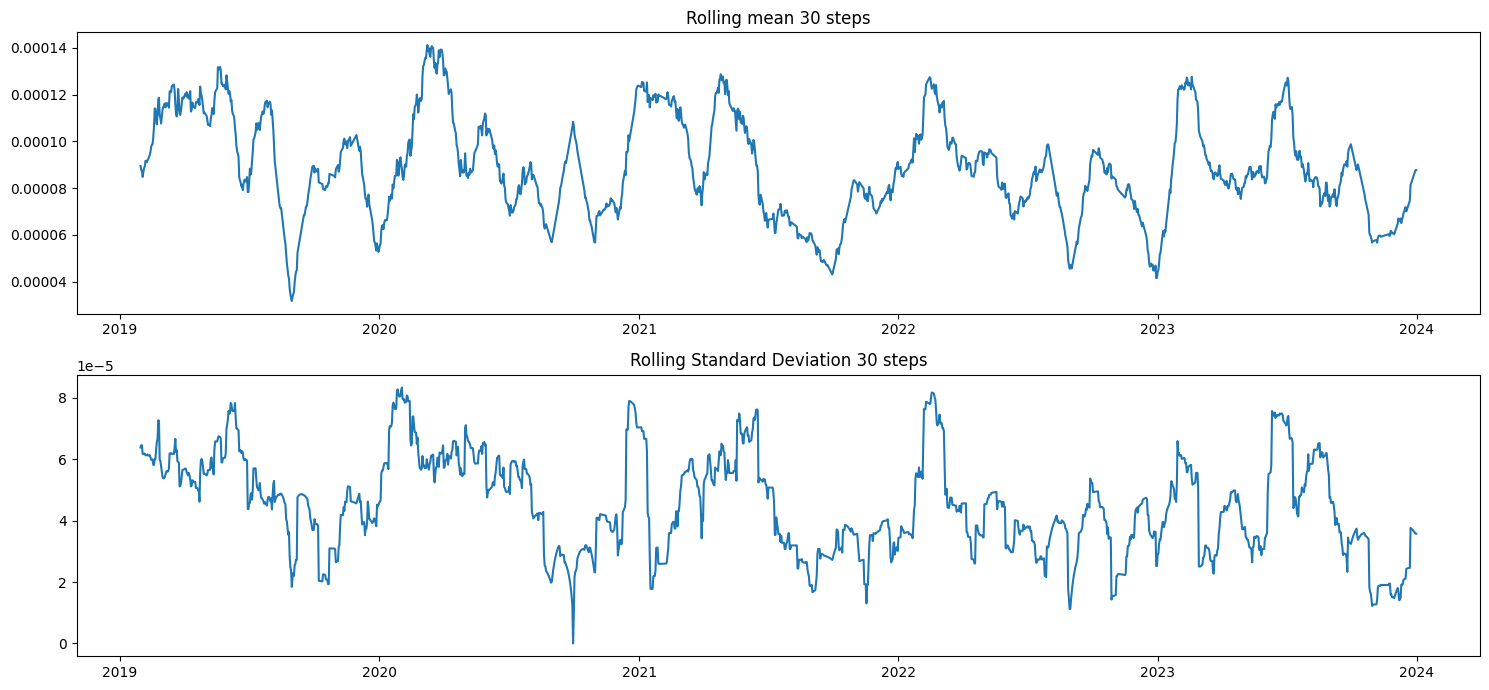

In [ ]:
import numpy as np

fig = plt.figure(figsize=(15, 7))
layout = (2, 2)
mv_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
std_ax = plt.subplot2grid(layout, (1, 0), colspan=2)

mm = Nuwara_data.HCHO_reading.rolling(30).mean()
mv_ax.plot(mm)
mv_ax.set_title("Rolling mean 30 steps")

std = Nuwara_data.HCHO_reading.rolling(30).std()
std_ax.plot(std)
std_ax.set_title("Rolling Standard Deviation 30 steps")

plt.tight_layout()

#**HCHO WEEKLY MEAN VS DATE**


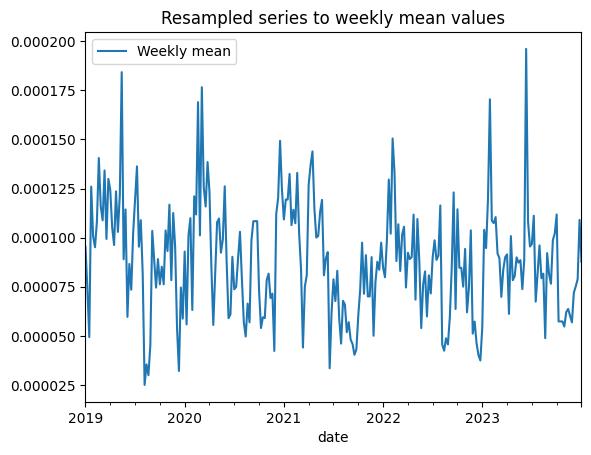

In [ ]:
# Looking for weekly seasonality
resample = Nuwara_data.resample('W')
weekly_mean = resample.mean()
weekly_mean.HCHO_reading.plot(label='Weekly mean')
plt.title("Resampled series to weekly mean values")
plt.legend()

#**POLYNOMIAL FIT**


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-16-9ad53a2f8564>:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(X, y, degree)


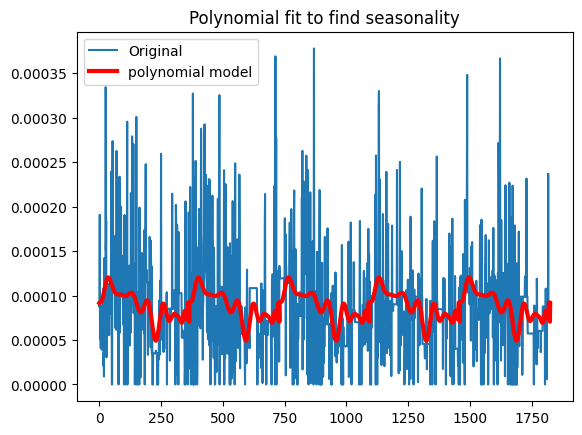

In [ ]:
# Fix xticks to show dates
# fit polynomial: x^2*b1 + x*b2 + ... + bn
series = Nuwara_data.HCHO_reading.values
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100
coef = np.polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

#**FINDING NOISE**


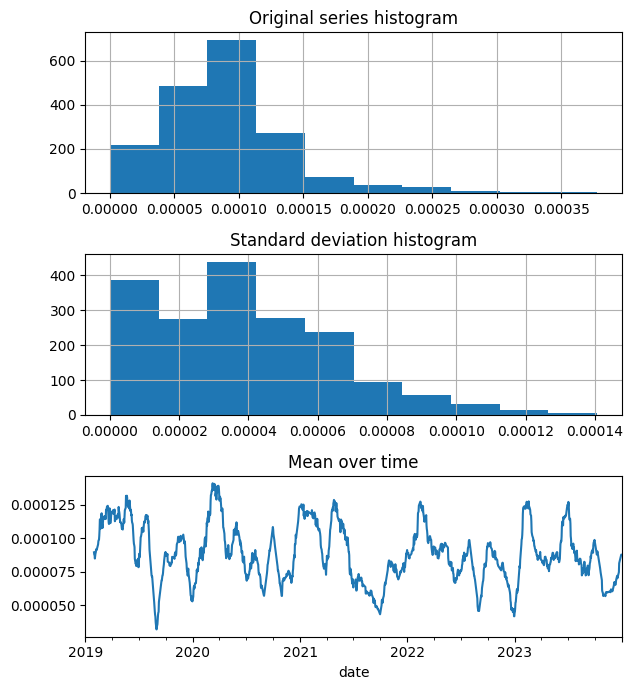

In [ ]:
fig = plt.figure(figsize=(12, 7))
layout = (3, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
hist_std_ax = plt.subplot2grid(layout, (1, 0))
mean_ax = plt.subplot2grid(layout, (2, 0))

Nuwara_data.HCHO_reading.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

mm = Nuwara_data.HCHO_reading.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = Nuwara_data.HCHO_reading.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")
plt.tight_layout()

#**PAC & AC PLOTS**


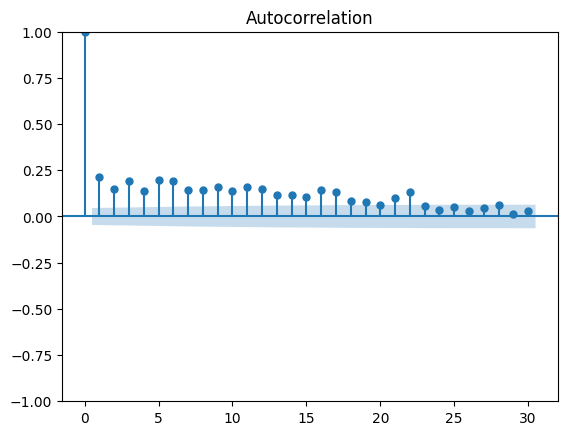

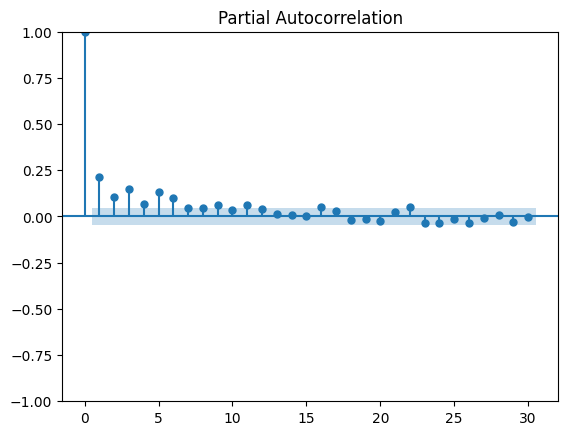

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series, lags=30)
plot_pacf(series, lags=30)
plt.show()

#**ADF TEST**


In [ ]:
from statsmodels.tsa.stattools import adfuller

X = Nuwara_data.HCHO_reading.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.094343
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
